<a href="https://colab.research.google.com/github/Callmewuxin/cloud_classifiation/blob/master/cloudnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# change directory and prepare the data


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive/My Drive/app/cloudNet

/content/gdrive/My Drive/app/cloudNet


In [0]:
!git clone https://github.com/Callmewuxin/CCSN_dataset.git

Cloning into 'CCSN_dataset'...
remote: Enumerating objects: 2539, done.
remote: Counting objects: 100% (2539/2539), done.
remote: Compressing objects: 100% (2539/2539), done.
remote: Total 2539 (delta 0), reused 2539 (delta 0), pack-reused 0
Receiving objects: 100% (2539/2539), 92.29 MiB | 13.20 MiB/s, done.
Checking out files: 100% (2543/2543), done.


In [0]:
cd ..

/content/gdrive/My Drive/app/cloudNet


# CNN_SENet by 50 epoch

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 196, 196, 32) 2432        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_33 (BatchNo (None, 196, 196, 32) 128         conv2d_21[0][0]                  
__________________________________________________________________________________________________
global_average_pooling2d_21 (Gl (None, 32)           0           batch_normalization_33[0][0]     
_______________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:144: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:144: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=79, validation_steps=23, class_weight="auto", callbacks=[<keras.ca..., epochs=50)`


Epoch 1/50
79/79 [==============================] - 30s 377ms/step - loss: 2.2713 - acc: 0.2124 - val_loss: 4.1089 - val_acc: 0.1209

Epoch 00001: val_acc improved from -inf to 0.12092, saving model to CNN_SENet_50.h5
Epoch 2/50
79/79 [==============================] - 19s 234ms/step - loss: 2.0064 - acc: 0.2917 - val_loss: 2.6993 - val_acc: 0.1912

Epoch 00002: val_acc improved from 0.12092 to 0.19120, saving model to CNN_SENet_50.h5
Epoch 3/50
79/79 [==============================] - 19s 243ms/step - loss: 1.8713 - acc: 0.3657 - val_loss: 1.9449 - val_acc: 0.2889

Epoch 00003: val_acc improved from 0.19120 to 0.28886, saving model to CNN_SENet_50.h5
Epoch 4/50
79/79 [==============================] - 19s 244ms/step - loss: 1.7848 - acc: 0.3962 - val_loss: 1.7795 - val_acc: 0.3948

Epoch 00004: val_acc improved from 0.28886 to 0.39477, saving model to CNN_SENet_50.h5
Epoch 5/50
79/79 [==============================] - 19s 243ms/step - loss: 1.7328 - acc: 0.4121 - val_loss: 1.9613 - va

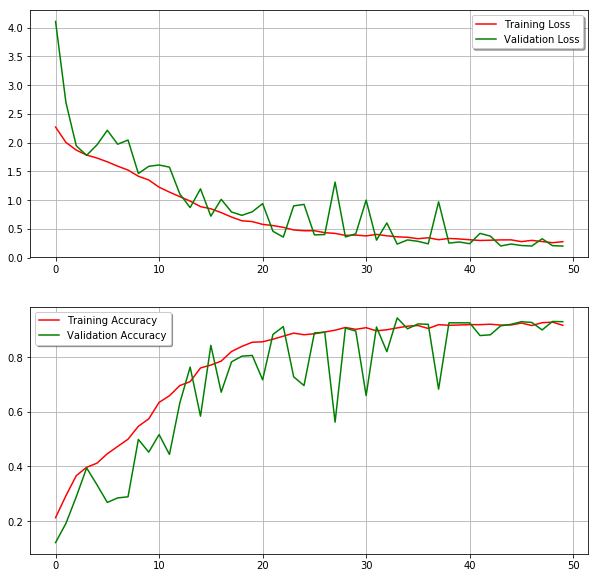

In [0]:
import keras
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, Convolution2D, Permute, Reshape, multiply, add, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import os
import matplotlib.pyplot as plt

c = 11
# se-block
def squeeze_excite_block(input, ratio=16):
    init = input
    filters = int(init.shape[-1])
    se_shape = (1, 1, filters)
    res = int(filters // ratio)
    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(res, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)


    x = multiply([init, se])
    return x

# input
input_data = Input(shape=[200, 200, 3])
# first layer
conv1 = Convolution2D(filters=32, kernel_size=[5, 5])(input_data)
BN1 = BatchNormalization()(conv1)
se1 = squeeze_excite_block(BN1)
ac1 = Activation('relu')(se1)
pool1 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac1)

# second layer
conv2 = Convolution2D(filters=64, kernel_size=[3, 3])(pool1)
BN2 = BatchNormalization()(conv2)
se2 = squeeze_excite_block(BN2)
ac2 = Activation('relu')(se2)
pool2 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac2)

# third layer
conv3 = Convolution2D(filters=64, kernel_size=[3, 3])(pool2)
BN3 = BatchNormalization()(conv3)
se3 = squeeze_excite_block(BN3)
ac3 = Activation('relu')(se3)
pool3 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac3)

# forth layer
conv4 = Convolution2D(filters=128, kernel_size=[2, 2])(pool3)
BN4 = BatchNormalization()(conv4)
se4 = squeeze_excite_block(BN4)
ac4 = Activation('relu')(se4)
pool4 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac4)

# fifth layer
conv5 = Convolution2D(filters=256, kernel_size=[2, 2])(pool4)
BN5 = BatchNormalization()(conv5)
se5 = squeeze_excite_block(BN5)
ac5 = Activation('relu')(se5)
pool5 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac5)

# flatten
flatten = Flatten()(pool5)

# fc1
fc1 = Dense(units=256)(flatten)
fc_bn1 = BatchNormalization()(fc1)
fc_ac1 = Activation('relu')(fc_bn1)

# fc2
fc2 = Dense(units=128)(fc_ac1)
fc_bn2 = BatchNormalization()(fc2)
fc_ac2 = Activation('relu')(fc_bn2)
dp = Dropout(0.5)(fc_ac2)

# fc3
fc3 = Dense(units=11)(dp)
fc_bn3 = BatchNormalization()(fc3)
output = Activation('softmax')(fc_bn3)

model = Model(inputs=input_data, outputs=output)

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# prepare data
train_dir = 'CCSN_dataset'  # 训练集数据


nb_epoches = int(50)                # epoch数量
batch_size = int(32)





#　图片生成器
train_datagen = ImageDataGenerator(rescale=1./255)
#validation_split=0.3 可以通过设置validation_split只从train文件中提取训练集和验证集（1）
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)


# 训练数据与测试数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')#subset='training'，假如设置了（1），可以通过设置subset来分配训练集和验证集

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#subset='validation'

# checkpoint
filepath = "CNN_SENet_50.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
if os.path.exists(filepath):
    model.load_weights(filepath)
    # 若成功加载前面保存的参数，输出下列信息
    print("checkpoint_loaded")


history_tl = model.fit_generator(
train_generator,
nb_epoch=nb_epoches,
validation_data=valid_generator,
steps_per_epoch= STEP_SIZE_TRAIN,
validation_steps = STEP_SIZE_VALID,
class_weight='auto',
callbacks=callbacks_list)

# draw result
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(history_tl.history['loss'], color='r', label='Training Loss')
ax[0].plot(history_tl.history['val_loss'], color='g', label='Validation Loss')
ax[0].legend(loc='best',shadow=True)
ax[0].grid(True)

ax[1].plot(history_tl.history['acc'], color='r', label='Training Accuracy')
ax[1].plot(history_tl.history['val_acc'], color='g', label='Validation Accuracy')
ax[1].legend(loc='best',shadow=True)
ax[1].grid(True)
plt.savefig("CNN_SENet+"+str(nb_epoches)+".png")
plt.show()


#CNN_SENet with data augmentation by 500epoch

In [0]:
import keras
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, Convolution2D, Permute, Reshape, multiply, add, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import os
import matplotlib.pyplot as plt

c = 11
# se-block
def squeeze_excite_block(input, ratio=16):
    init = input
    filters = int(init.shape[-1])
    print(type(filters))
    se_shape = (1, 1, filters)
    res = int(filters // ratio)
    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(res, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)


    x = multiply([init, se])
    return x

# input
input_data = Input(shape=[200, 200, 3])
# first layer
conv1 = Convolution2D(filters=32, kernel_size=[5, 5])(input_data)
BN1 = BatchNormalization()(conv1)
se1 = squeeze_excite_block(BN1)
ac1 = Activation('relu')(se1)
pool1 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac1)

# second layer
conv2 = Convolution2D(filters=64, kernel_size=[3, 3])(pool1)
BN2 = BatchNormalization()(conv2)
se2 = squeeze_excite_block(BN2)
ac2 = Activation('relu')(se2)
pool2 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac2)

# third layer
conv3 = Convolution2D(filters=64, kernel_size=[3, 3])(pool2)
BN3 = BatchNormalization()(conv3)
se3 = squeeze_excite_block(BN3)
ac3 = Activation('relu')(se3)
pool3 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac3)

# forth layer
conv4 = Convolution2D(filters=128, kernel_size=[2, 2])(pool3)
BN4 = BatchNormalization()(conv4)
se4 = squeeze_excite_block(BN4)
ac4 = Activation('relu')(se4)
pool4 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac4)

# fifth layer
conv5 = Convolution2D(filters=256, kernel_size=[2, 2])(pool4)
BN5 = BatchNormalization()(conv5)
se5 = squeeze_excite_block(BN5)
ac5 = Activation('relu')(se5)
pool5 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac5)

# flatten
flatten = Flatten()(pool5)

# fc1
fc1 = Dense(units=256)(flatten)
fc_bn1 = BatchNormalization()(fc1)
fc_ac1 = Activation('relu')(fc_bn1)

# fc2
fc2 = Dense(units=128)(fc_ac1)
fc_bn2 = BatchNormalization()(fc2)
fc_ac2 = Activation('relu')(fc_bn2)
dp = Dropout(0.5)(fc_ac2)

# fc3
fc3 = Dense(units=11)(dp)
fc_bn3 = BatchNormalization()(fc3)
output = Activation('softmax')(fc_bn3)

model = Model(inputs=input_data, outputs=output)

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# prepare data
train_dir = 'CCSN_dataset'  # 训练集数据


nb_epoches = int(500)                # epoch数量
batch_size = int(32)





#　图片生成器
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
#validation_split=0.3 可以通过设置validation_split只从train文件中提取训练集和验证集（1）
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)


# In[7]:


# 训练数据与测试数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')#subset='training'，假如设置了（1），可以通过设置subset来分配训练集和验证集

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#subset='validation'

# checkpoint
filepath = "CNN_SENet_500.h5"


STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
if os.path.exists(filepath):
    model.load_weights(filepath)
    # 若成功加载前面保存的参数，输出下列信息
    print("checkpoint_loaded")


history_tl = model.fit_generator(
train_generator,
nb_epoch=nb_epoches,
validation_data=valid_generator,
steps_per_epoch= STEP_SIZE_TRAIN,
validation_steps = STEP_SIZE_VALID,
class_weight='auto')

# draw result
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(history_tl.history['loss'], color='r', label='Training Loss')
ax[0].plot(history_tl.history['val_loss'], color='g', label='Validation Loss')
ax[0].legend(loc='best',shadow=True)
ax[0].grid(True)

ax[1].plot(history_tl.history['acc'], color='r', label='Training Accuracy')
ax[1].plot(history_tl.history['val_acc'], color='g', label='Validation Accuracy')
ax[1].legend(loc='best',shadow=True)
ax[1].grid(True)
plt.savefig("CNN_SENet+"+str(nb_epoches)+".png")
plt.show()


W0715 03:49:49.512908 139647594452864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0715 03:49:49.659061 139647594452864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


W0715 03:49:50.631622 139647594452864 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0715 03:49:50.757961 139647594452864 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 196, 196, 32) 2432        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 196, 196, 32) 128         conv2d_2[0][0]                   
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 32)           0           batch_normalization_2[0][0]      
__________________________________________________________________________________________________
reshape_1 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:143: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:143: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=79, validation_steps=23, class_weight="auto", epochs=500)`
W0715 03:49:59.192035 139647594452864 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in 

Epoch 1/500
11/79 [===>..........................] - ETA: 13:31 - loss: 2.5210 - acc: 0.1364

KeyboardInterrupt: ignored

# VGG 16

In [0]:
import keras
from keras.applications import InceptionV3,Xception,MobileNet,VGG16
from keras.layers import Activation,Add,AveragePooling1D,Dense,Dropout,GlobalAveragePooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.models import Model
from keras.optimizers import Adam,SGD,Adadelta,RMSprop
from keras.utils import np_utils
import os
from keras.callbacks import ModelCheckpoint
import glob
import matplotlib.pyplot as plt




IM_WIDTH, IM_HEIGHT =224,224 #InceptionV3指定的图片尺寸
train_dir = 'train_test/train'  # 训练集数据
val_dir = 'train_test/test' # 验证集数据


nb_classes = 11
nb_epoches = int(50)                # epoch数量
batch_size = int(32)





#　图片生成器
train_datagen =  ImageDataGenerator(height_shift_range=0.2,
                                    width_shift_range=0.2,
                                    rescale=1./255,
                                    vertical_flip=True,
                                    horizontal_flip=True)
#validation_split=0.3 可以通过设置validation_split只从train文件中提取训练集和验证集（1）
valid_datagen =  ImageDataGenerator(height_shift_range=0.2,
                                    width_shift_range=0.2,
                                    rescale=1./255,
                                    vertical_flip=True,
                                    horizontal_flip=True)


# In[7]:


# 训练数据与测试数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')#subset='training'，假如设置了（1），可以通过设置subset来分配训练集和验证集

valid_generator = valid_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')#subset='validation'


def add_new_last_layer(base_model, nb_classes):
    x = base_model.layers[-6].output#注意这个地方-------->>>>base_model.layers[11].output 这样就可以控制我们导入的模型到底使用多少层
    x = GlobalAveragePooling2D()(x)
    x = Dense(512,activation='relu')(x)
    x = Dense(128,activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(nb_classes, activation='softmax')(x) #new softmax layer
    model = Model(input=base_model.input, output=predictions)
    return model

sgd = SGD(lr=0.001, decay=0.9)
# 冻上base_model所有层，这样就可以正确获得bottleneck特征
def setup_to_transfer_learn(model, base_model):
    """Freeze all layers and compile the model"""
    for layer in base_model.layers:
        layer.trainable =False#这里可以设置我们导入base_model哪些层可以训练，哪些层参数是固定的
        model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# 定义网络框架
base_model = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3)) # 预先要下载no_top模型
print("Total layers'number is:",len(base_model.layers))
base_model.summary()




model = add_new_last_layer(base_model,11)  # 从base_model上添加新层
setup_to_transfer_learn(model, base_model)
model.summary()

filepath="cloud_vgg.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# In[10]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

# 模式一训练
history_tl = model.fit_generator(
train_generator,
nb_epoch=nb_epoches,
validation_data=valid_generator,
steps_per_epoch= STEP_SIZE_TRAIN,
validation_steps = STEP_SIZE_VALID,
class_weight='auto',
callbacks=callbacks_list)


# In[34]:





# In[35]:


# learning curves
fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(history_tl.history['loss'], color='r', label='Training Loss')
ax[0].plot(history_tl.history['val_loss'], color='g', label='Validation Loss')
ax[0].legend(loc='best',shadow=True)
ax[0].grid(True)

ax[1].plot(history_tl.history['acc'], color='r', label='Training Accuracy')
ax[1].plot(history_tl.history['val_acc'], color='g', label='Validation Accuracy')
ax[1].legend(loc='best',shadow=True)
ax[1].grid(True)
plt.savefig("result+"+str(nb_epoches)+".png")
plt.show()



#https://blog.csdn.net/weixin_41972134/article/details/81985944 这个网址说明了loss变化情况来分析训练模型可能遇到的所有情况
#自己实验了InceptionV3,Xception,MobileNet,VGG16,Deasenet121等网络，发现InceptionV3，Xception,Deasenet121都会有过拟合现象，主要原因还是数据少
#轻量级网络MobileNet以及VGG16表现都不错

#我带学生做到的东西：
#（1）迁移学习
#（2）数据增广
#（3）从头搭建了自己的cnn
#（4）学生懂得在别人模型基础上加全连接层，增加模型表达能力，会Dropout等操作。

#存在的不足：
#开始的时候出现了严重的过拟合，现在通过使用参数量少的网络，效果有很好的提升。但也出现了验证集正确率高于训练集，我认为这种情况也可以理解

#可以改进的地方：
#（1）数据整理，因为每一类杂草的图片包含它生长的不同时期图片，这对网络来说是难点，整理图片后网络效果应该能表现的很好
#（2）可以试验的方案有很多，但目前因为时间原因，试验的网络比较少



Found 1784 images belonging to 11 classes.
Found 759 images belonging to 11 classes.
Total layers'number is: 19
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:107: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=223, validation_steps=94, class_weight="auto", callbacks=[<keras.ca..., epochs=500)`


Epoch 1/500
114/223 [==============>...............] - ETA: 6:51 - loss: 2.4390 - acc: 0.0998

KeyboardInterrupt: ignored

#Cloud Net

In [0]:
import keras
import os
from keras.models import Model
from keras.layers import Dropout, Conv2D, Dense, MaxPooling2D, Flatten, Input
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

train_data_dir = 'train_test/train/'
test_data_dir = 'train_test/test/'
batch_size = 8
epochs = 20000
size = 227
input_data = Input(shape=[size, size, 3])
conv1 = Conv2D(filters=96, kernel_size=[11, 11], strides=[4, 4], activation='relu')(input_data)
maxpool1 = MaxPooling2D(pool_size=[3, 3], strides=[2, 2])(conv1)
conv2 = Conv2D(filters=256, kernel_size=[5, 5], padding='same', activation='relu')(maxpool1)
maxpool2 = MaxPooling2D(pool_size=[3, 3], strides=[2, 2])(conv2)
conv3 = Conv2D(filters=384, kernel_size=[3, 3], padding='same', activation='relu')(maxpool2)
conv4 = Conv2D(filters=256, kernel_size=[3, 3], padding='same', activation='relu')(conv3)
maxpool3 = MaxPooling2D(pool_size=[3, 3], strides=[2, 2])(conv4)
flatten = Flatten()(maxpool3)
drouput = Dropout(0.5)(flatten)
fc1 = Dense(units=4096, activation='relu')(drouput)
fc2 = Dense(units=11, activation='softmax')(fc1)


model = Model(inputs=input_data, outputs=fc2)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
train_datagen = ImageDataGenerator()

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(size, size),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(size, size),
    batch_size=batch_size,
    class_mode='categorical')
print(train_generator.labels)
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print(train_generator.n, validation_generator.n)
filepath="cloud_net.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
if os.path.exists(filepath):
    model.load_weights(filepath)
    # 若成功加载前面保存的参数，输出下列信息
    print("checkpoint_loaded")
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch= STEP_SIZE_TRAIN,
    validation_data= validation_generator,
    validation_steps= STEP_SIZE_VALID,
    callbacks=callbacks_list)

model.save('cloundNet.h5')
history_dict=history.history
loss=history_dict['loss']
val=history_dict['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val,'b',label='val loss')
plt.legend()
plt.show()



Found 1784 images belonging to 11 classes.
Found 759 images belonging to 11 classes.
[ 0  0  0 ... 10 10 10]
1784 759


W0624 07:58:50.488854 139877878048640 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20000
209/223 [===========================>..] - ETA: 31s - loss: 13.9709 - acc: 0.1328

KeyboardInterrupt: ignored

# AlexNet

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 256)       884992    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=79, validation_steps=23, class_weight="auto", callbacks=[<keras.ca..., epochs=50)`
W0725 21:27:29.532968 139907436840832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated a

Epoch 1/50
79/79 [==============================] - 1312s 17s/step - loss: 2.3978 - acc: 0.1187 - val_loss: 2.3126 - val_acc: 0.1617

Epoch 00001: val_acc improved from -inf to 0.16168, saving model to AlexNet_50.h5
Epoch 2/50
79/79 [==============================] - 18s 227ms/step - loss: 2.3224 - acc: 0.1583 - val_loss: 2.2166 - val_acc: 0.2627

Epoch 00002: val_acc improved from 0.16168 to 0.26272, saving model to AlexNet_50.h5
Epoch 3/50
79/79 [==============================] - 14s 174ms/step - loss: 2.2595 - acc: 0.1906 - val_loss: 2.0734 - val_acc: 0.2531

Epoch 00003: val_acc did not improve from 0.26272
Epoch 4/50
79/79 [==============================] - 14s 172ms/step - loss: 2.2056 - acc: 0.2188 - val_loss: 2.0649 - val_acc: 0.2779

Epoch 00004: val_acc improved from 0.26272 to 0.27785, saving model to AlexNet_50.h5
Epoch 5/50
79/79 [==============================] - 13s 167ms/step - loss: 2.1615 - acc: 0.2475 - val_loss: 1.9554 - val_acc: 0.3329

Epoch 00005: val_acc improve

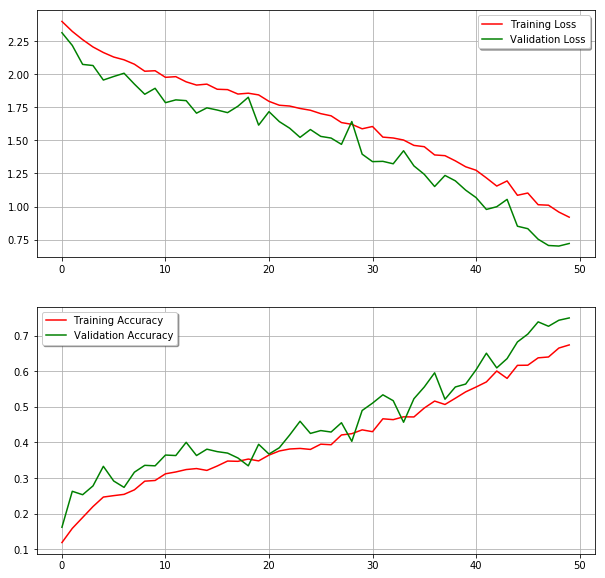

In [0]:
import keras
from keras.applications import InceptionV3,Xception,MobileNet,VGG16
from keras.layers import Activation,Add,AveragePooling1D,Dense,Dropout,GlobalAveragePooling2D,Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.models import Model, Sequential
from keras.optimizers import Adam,SGD,Adadelta,RMSprop, Adagrad
from keras.utils import np_utils
import os
from keras.callbacks import ModelCheckpoint
import glob
import numpy as np
import matplotlib.pyplot as plt


IM_WIDTH, IM_HEIGHT =227,227 #Alex Net指定的图片尺寸

# design model
model = Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(227,227,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))

# compile model
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.summary()

# prepare data
train_dir = 'CCSN_dataset'  # 训练集数据


nb_epoches = int(50)                # epoch数量
batch_size = int(32)



#　图片生成器
train_datagen = ImageDataGenerator(rescale=1./255)
#validation_split=0.3 可以通过设置validation_split只从train文件中提取训练集和验证集（1）
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)


# 训练数据与测试数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')#subset='training'，假如设置了（1），可以通过设置subset来分配训练集和验证集

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#subset='validation'

# checkpoint
filepath = "AlexNet_50.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
if os.path.exists(filepath):
    model.load_weights(filepath)
    # 若成功加载前面保存的参数，输出下列信息
    print("checkpoint_loaded")


history_tl = model.fit_generator(
train_generator,
nb_epoch=nb_epoches,
validation_data=valid_generator,
steps_per_epoch= STEP_SIZE_TRAIN,
validation_steps = STEP_SIZE_VALID,
class_weight='auto',
callbacks=callbacks_list)

# draw result
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(history_tl.history['loss'], color='r', label='Training Loss')
ax[0].plot(history_tl.history['val_loss'], color='g', label='Validation Loss')
ax[0].legend(loc='best',shadow=True)
ax[0].grid(True)

ax[1].plot(history_tl.history['acc'], color='r', label='Training Accuracy')
ax[1].plot(history_tl.history['val_acc'], color='g', label='Validation Accuracy')
ax[1].legend(loc='best',shadow=True)
ax[1].grid(True)
plt.savefig("AlexNet+"+str(nb_epoches)+".png")
plt.show()

# ResNet

Using TensorFlow backend.
W0726 15:08:46.413503 139816331995008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 15:08:46.448842 139816331995008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 15:08:46.458404 139816331995008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0726 15:08:46.492171 139816331995008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session inste

94658560/94653016 [==============================] - 1s 0us/step


W0726 15:08:58.050643 139816331995008 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 197, 197, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 203, 203, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 99, 99, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 99, 99, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=79, validation_steps=23, class_weight="auto", callbacks=[<keras.ca..., epochs=50)`
W0726 15:09:07.063221 139816331995008 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated a

Epoch 1/50
79/79 [==============================] - 575s 7s/step - loss: 10.0364 - acc: 0.2686 - val_loss: 12.6045 - val_acc: 0.0747

Epoch 00001: val_acc improved from -inf to 0.07473, saving model to ResNet_50.h5
Epoch 2/50
79/79 [==============================] - 16s 199ms/step - loss: 8.8906 - acc: 0.4104 - val_loss: 11.3524 - val_acc: 0.1458

Epoch 00002: val_acc improved from 0.07473 to 0.14580, saving model to ResNet_50.h5
Epoch 3/50
79/79 [==============================] - 15s 185ms/step - loss: 7.3926 - acc: 0.5004 - val_loss: 13.8503 - val_acc: 0.0715

Epoch 00003: val_acc did not improve from 0.14580
Epoch 4/50
79/79 [==============================] - 14s 182ms/step - loss: 6.5953 - acc: 0.5534 - val_loss: 10.1887 - val_acc: 0.0770

Epoch 00004: val_acc did not improve from 0.14580
Epoch 5/50
79/79 [==============================] - 15s 184ms/step - loss: 5.9793 - acc: 0.5939 - val_loss: 11.0253 - val_acc: 0.1032

Epoch 00005: val_acc did not improve from 0.14580
Epoch 6/50


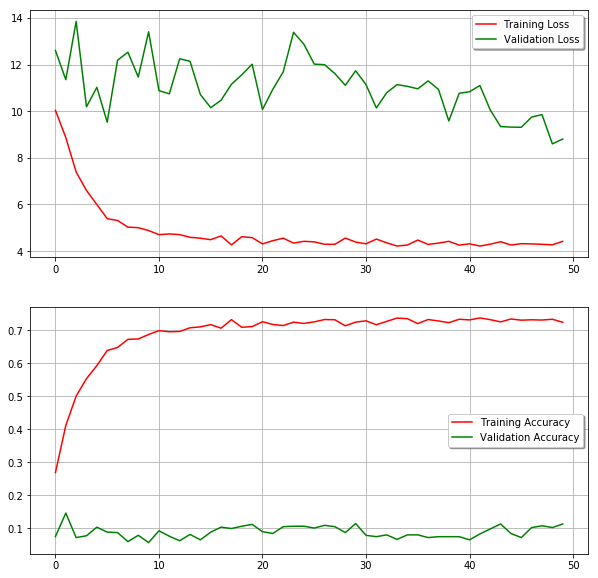

In [0]:
import keras
from keras.applications import InceptionV3,Xception,MobileNet,VGG16, ResNet50
from keras.layers import Activation,Add,AveragePooling1D,Dense,Dropout,GlobalAveragePooling2D,Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.models import Model, Sequential
from keras.optimizers import Adam,SGD,Adadelta,RMSprop, Adagrad
from keras.utils import np_utils
import os
from keras.callbacks import ModelCheckpoint
import glob
import numpy as np
import matplotlib.pyplot as plt


def ResNet50_model(lr=0.001, decay=1e-6, momentum=0.9, nb_classes=11, img_rows=197, img_cols=197, RGB=True,
                  ):
    color = 3 if RGB else 1
    base_model = ResNet50(weights='imagenet', include_top=False, pooling=None, input_shape=(img_rows, img_cols, color),
                          classes=nb_classes)

    # 冻结base_model所有层，这样就可以正确获得bottleneck特征
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    # 添加自己的全链接分类层
    x = Flatten()(x)
    # x = GlobalAveragePooling2D()(x)
    # x = Dense(1024, activation='relu')(x)
    predictions = Dense(nb_classes, activation='softmax')(x)

    # 训练模型
    model = Model(inputs=base_model.input, outputs=predictions)
    sgd = SGD(lr=lr, decay=decay, momentum=momentum, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])



    return model


# define model
model = ResNet50_model()
model.summary()
# prepare data
train_dir = 'CCSN_dataset'  # 训练集数据


nb_epoches = int(50)                # epoch数量
batch_size = int(32)



#　图片生成器
train_datagen = ImageDataGenerator(rescale=1./255)
#validation_split=0.3 可以通过设置validation_split只从train文件中提取训练集和验证集（1）
valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)


# 训练数据与测试数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(197, 197),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')#subset='training'，假如设置了（1），可以通过设置subset来分配训练集和验证集

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    target_size=(197, 197),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')#subset='validation'

# checkpoint
filepath = "ResNet_50.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
if os.path.exists(filepath):
    model.load_weights(filepath)
    # 若成功加载前面保存的参数，输出下列信息
    print("checkpoint_loaded")


history_tl = model.fit_generator(
train_generator,
nb_epoch=nb_epoches,
validation_data=valid_generator,
steps_per_epoch= STEP_SIZE_TRAIN,
validation_steps = STEP_SIZE_VALID,
class_weight='auto',
callbacks=callbacks_list)

# draw result
fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(history_tl.history['loss'], color='r', label='Training Loss')
ax[0].plot(history_tl.history['val_loss'], color='g', label='Validation Loss')
ax[0].legend(loc='best',shadow=True)
ax[0].grid(True)

ax[1].plot(history_tl.history['acc'], color='r', label='Training Accuracy')
ax[1].plot(history_tl.history['val_acc'], color='g', label='Validation Accuracy')
ax[1].legend(loc='best',shadow=True)
ax[1].grid(True)
plt.savefig("ResNet+"+str(nb_epoches)+".png")
plt.show()

# predict using CNN_SENet

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import tensorflow as tf
import os

def loadmodel():
    print('start load model')
    global model
    model_dir = 'cloudnet.h5'
    if os.path.exists(model_dir):
        print('yes it is')
        model = load_model(model_dir)
    else:
        print('it doesnt')
    global graph
    graph = tf.get_default_graph()

def preprocess():
    img_width = 200
    img_height = 200
    datadir = 'tc'
    # only rescaling
    test_datagen = ImageDataGenerator(rescale=1. / 255)
    validation_generator = test_datagen.flow_from_directory(
        datadir,
        target_size=(img_width, img_height),
        batch_size=1,
        class_mode='binary')
    with graph.as_default():
        preds = model.predict_generator(validation_generator, steps=1)

model = load_model('CNN_SENet.h5')
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(200, 200),
    batch_size=1,
    class_mode='categorical'
)
pred = model.predict_generator(test_generator, steps=1)
print(pred)

# predict using pandas

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import tensorflow as tf
import os
import pandas as pd
import numpy as np


model_dir = 'CNN_SENet_50.h5'
if os.path.exists(model_dir):
  print('yes')
else:
  print('no')
cloud_dict = {'Ac': 0, 'As': 1, 'Cb': 2, 'Cc': 3, 'Ci': 4, 'Cs': 5, 'Ct': 6, 'Cu': 7, 'Ns': 8, 'Sc': 9, 'St': 10}
labels = dict((v, k) for k, v in cloud_dict.items())
description = {'Ci': 'Cirrus Fibrous, white feathery clouds of ice crystals.',
               'Cs': 'Cirrostratus Milky, translucent cloud veil of ice crystals.',
               'Cc': '268 Cirrocumulus Fleecy cloud, cloud banks of small, white flakes.',
               'Ac': 'Altocumulus Grey cloud bundles, compound like rough fleecy cloud.',
               'As': 'Altostratus Dense, gray layer cloud, often even and opaque.',
               'Cu': 'Cumulus Heap clouds with flat bases in the middle or lower level.',
               'Cb': 'Cumulonimbus Middle or lower cloud level thundercloud.',
               'Ns': 'Nimbostratus Rain cloud. Grey, dark layer cloud, indistinct outlines.',
               'Sc': 'Stratocumulus Rollers or banks of compound dark gray layer cloud.',
               'St': 'Stratus Low layer cloud, causes fog or fine precipitation.',
               'Ct': 'Contrails Line-shaped clouds produced by aircraft engine.' }
test_dir = 'CCSN_dataset'
model = load_model(model_dir)
test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.3)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=759,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)
true_label = test_generator.classes
true_name = [labels[k] for k in true_label]
print(len(true_name))
test_generator.reset()
pred = model.predict_generator(test_generator, steps=1)
predicted_class_indices = np.argmax(pred, axis=1)
predictions = [labels[k] for k in predicted_class_indices]
print(len(predictions))
print(true_name)
print(predictions)
descriptions = [description[k] for k in predictions]
print(pd.crosstab(true_label,predicted_class_indices,rownames=['label'],colnames=['predict']))

yes
Found 759 images belonging to 11 classes.
759
759
['Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'Ac', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'As', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb', 'Cb

# confusion matrix

__main__
_test_cm: test function with confusion matrix done
and pause


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


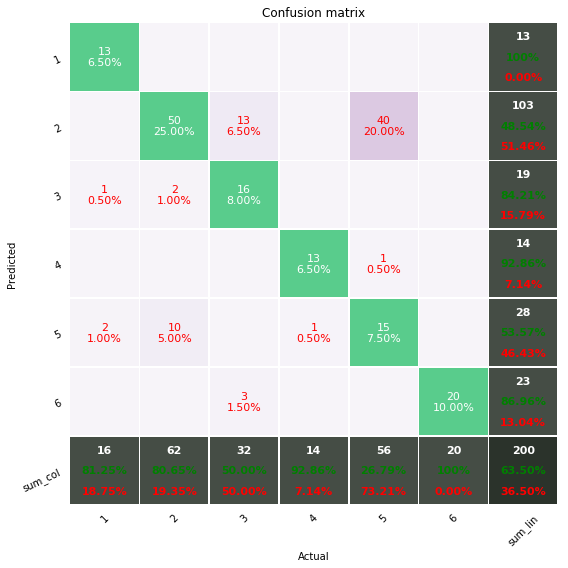

_test_data_class: test function with y_test (actual values) and predictions (predic)


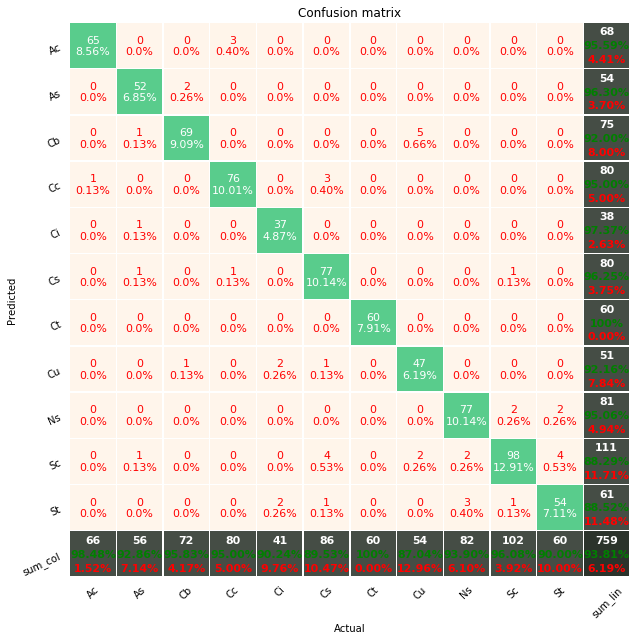

In [0]:
#imports
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=11,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#



#
#TEST functions
#
def _test_cm():
    #test function with confusion matrix done
    array = np.array( [[13,  0,  1,  0,  2,  0],
                       [ 0, 50,  2,  0, 10,  0],
                       [ 0, 13, 16,  0,  0,  3],
                       [ 0,  0,  0, 13,  1,  0],
                       [ 0, 40,  0,  1, 15,  0],
                       [ 0,  0,  0,  0,  0, 20]])
    #get pandas dataframe
    df_cm = DataFrame(array, index=range(1,7), columns=range(1,7))
    #colormap: see this and choose your more dear
    cmap = 'PuRd'
    pretty_plot_confusion_matrix(df_cm, cmap=cmap)
#

def _test_data_class():
    """ test function with y_test (actual values) and predictions (predic) """
    #data
    y_test = np.array(true_label)
    predic = np.array(predicted_class_indices)
    """
      Examples to validate output (confusion matrix plot)
        actual: 5 and prediction 1   >>  3
        actual: 2 and prediction 4   >>  1
        actual: 3 and prediction 4   >>  10
    """
    columns = list(cloud_dict.keys())
    annot = True;
    cmap = 'Oranges';
    fmt = '.2f'
    lw = 0.5
    cbar = False
    show_null_values = 2
    pred_val_axis = 'y'
    #size::
    fz = 12;
    figsize = [9,9];
    if(len(y_test) > 10):
        fz=9; figsize=[14,14];
    plot_confusion_matrix_from_data(y_test, predic, columns,
      annot, cmap, fmt, fz, lw, cbar, figsize, show_null_values, pred_val_axis)
#


#
#MAIN function
#
if(__name__ == '__main__'):
    print('__main__')
    print('_test_cm: test function with confusion matrix done\nand pause')
    _test_cm()
    plt.pause(5)
    print('_test_data_class: test function with y_test (actual values) and predictions (predic)')
    _test_data_class()

# draw CNN_SENet architecture

In [0]:
import keras
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, Convolution2D, Permute, Reshape, multiply, add, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import keras.backend as K
from keras.callbacks import ModelCheckpoint
import os
from keras.utils import plot_model

c = 11
# se-block
def squeeze_excite_block(input, ratio=16):
    init = input
    filters = int(init.shape[-1])
    se_shape = (1, 1, filters)
    res = int(filters // ratio)
    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(res, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)


    x = multiply([init, se])
    return x

# input
input_data = Input(shape=[200, 200, 3])
# first layer
conv1 = Convolution2D(filters=32, kernel_size=[5, 5])(input_data)
BN1 = BatchNormalization()(conv1)
se1 = squeeze_excite_block(BN1)
ac1 = Activation('relu')(se1)
pool1 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac1)

# second layer
conv2 = Convolution2D(filters=64, kernel_size=[3, 3])(pool1)
BN2 = BatchNormalization()(conv2)
se2 = squeeze_excite_block(BN2)
ac2 = Activation('relu')(se2)
pool2 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac2)

# third layer
conv3 = Convolution2D(filters=64, kernel_size=[3, 3])(pool2)
BN3 = BatchNormalization()(conv3)
se3 = squeeze_excite_block(BN3)
ac3 = Activation('relu')(se3)
pool3 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac3)

# forth layer
conv4 = Convolution2D(filters=128, kernel_size=[2, 2])(pool3)
BN4 = BatchNormalization()(conv4)
se4 = squeeze_excite_block(BN4)
ac4 = Activation('relu')(se4)
pool4 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac4)

# fifth layer
conv5 = Convolution2D(filters=256, kernel_size=[2, 2])(pool4)
BN5 = BatchNormalization()(conv5)
se5 = squeeze_excite_block(BN5)
ac5 = Activation('relu')(se5)
pool5 = MaxPooling2D(pool_size=[2, 2], strides=[2, 2])(ac5)

# flatten
flatten = Flatten()(pool5)

# fc1
fc1 = Dense(units=256)(flatten)
fc_bn1 = BatchNormalization()(fc1)
fc_ac1 = Activation('relu')(fc_bn1)

# fc2
fc2 = Dense(units=128)(fc_ac1)
fc_bn2 = BatchNormalization()(fc2)
fc_ac2 = Activation('relu')(fc_bn2)
dp = Dropout(0.5)(fc_ac2)

# fc3
fc3 = Dense(units=11)(dp)
fc_bn3 = BatchNormalization()(fc3)
output = Activation('softmax')(fc_bn3)

model = Model(inputs=input_data, outputs=output)
plot_model(model, to_file='model.png')

W0726 07:53:03.021643 140684911986560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 07:53:03.087345 140684911986560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 07:53:03.095702 140684911986560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 07:53:03.147280 140684911986560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0726 07:53:03.148342 1406849119